
# Investigating how thickness and loss in polymer coating interplay

Coated hollow glass tube in air.

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

n_im = 1e-3
n_poly = n_glass - n_im * 1j

mats = ['air', 'glass', 'poly', 'air']

T = 60
ts = [15e-6,.5*15e-6, T*15e-6, 2*15e-6]
scale = 15e-6
wl = 1.8e-6

ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]

In [3]:
A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=[.1,.05, .015, .1], scale=scale, wl=wl)


In [4]:
Draw(CF(list(A.ns)), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [453]:
k_low = (A.k0 * A.ns[0] * A.scale).real
k_low

52.37439014709314

In [454]:
outer = 'h2'
nu = 1

<IPython.core.display.Javascript object>


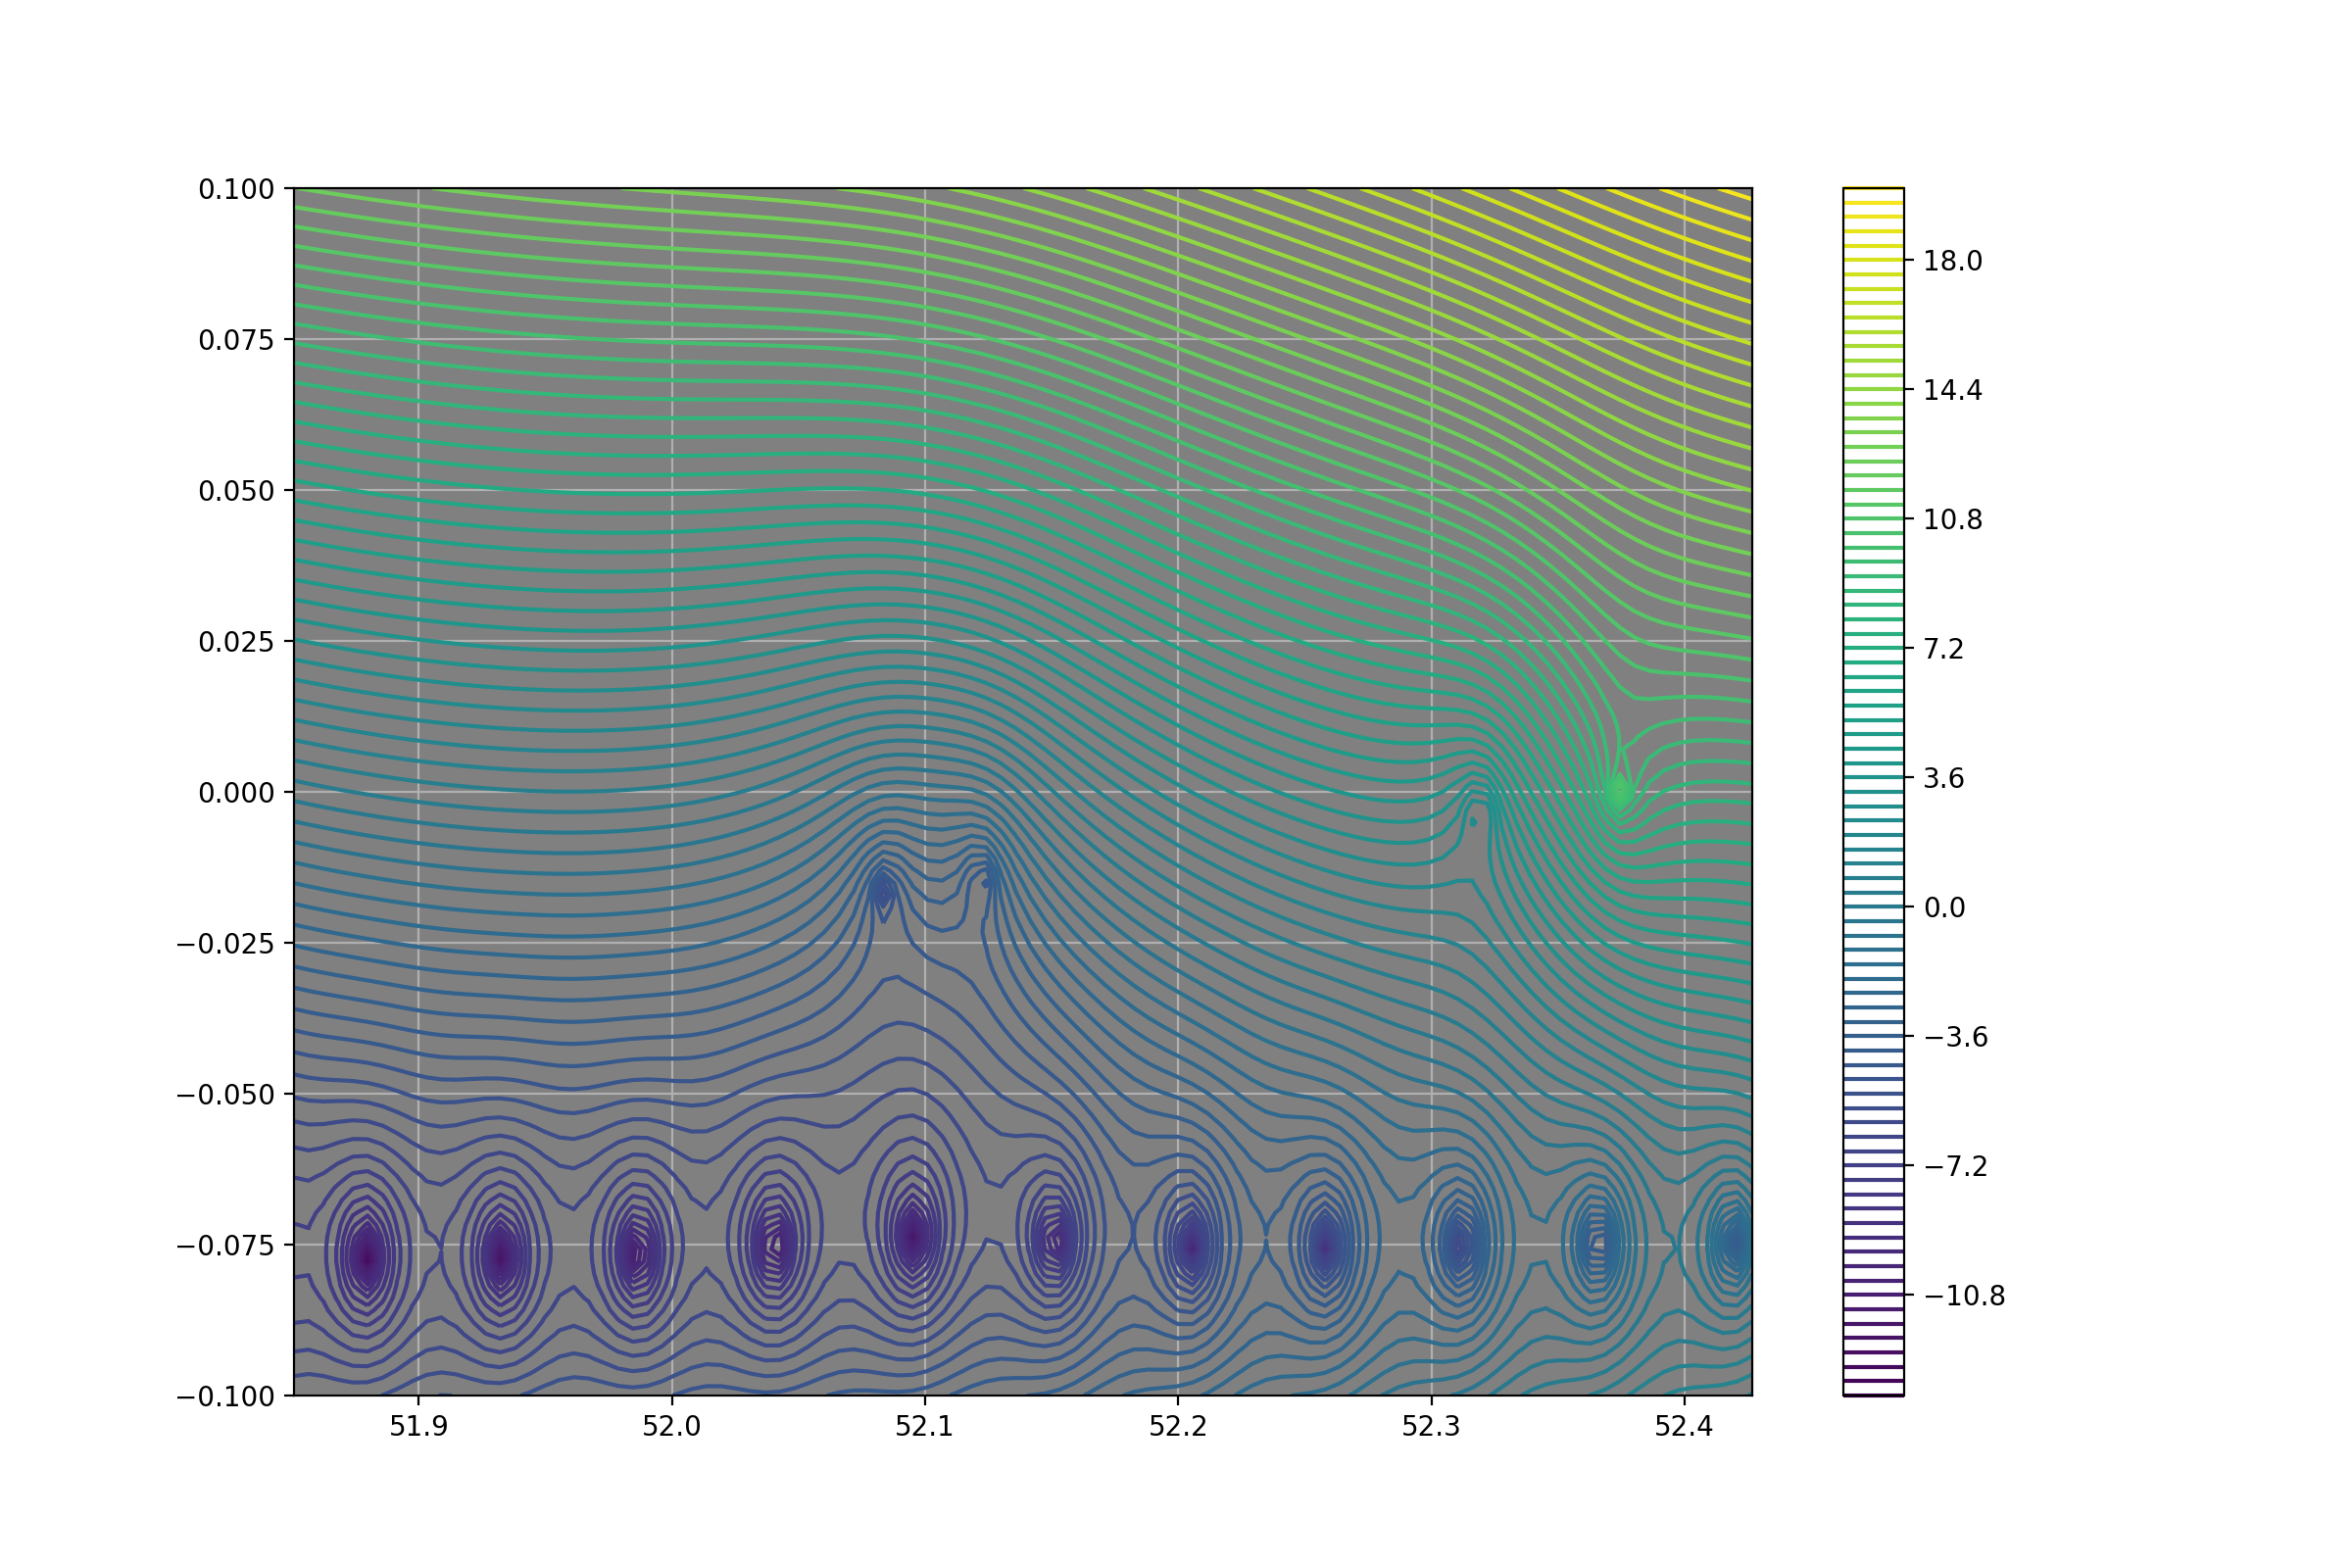

In [456]:
%matplotlib notebook
plotlogf(A.determinant, .99*k_low, 1.001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [468]:
guess = np.array(.999 * k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (52.319300014493024-0.00312726830288546j) . Residual of determinant:  8.94778711681543e-12


# Bragg Exact Fields

In [469]:
Fs = A.all_fields(beta1, nu, outer)

### Electric

In [470]:
fs = A.fields_matplot(beta1, nu, outer)

In [471]:
Ez_rad = fs['Sz_rad']

In [472]:
nr = [100, 100, 15000, 100]
rhos = np.concatenate([[1e-9], A.rhos/ A.scale])
rs = np.concatenate([np.linspace(rhos[i], rhos[i+1], nr[i])[:-1]
                    for i in range(len(rhos)-1)])

thetas = np.linspace(0, 2*np.pi, 1000)

In [473]:
ys = Ez_rad(rs)

<IPython.core.display.Javascript object>


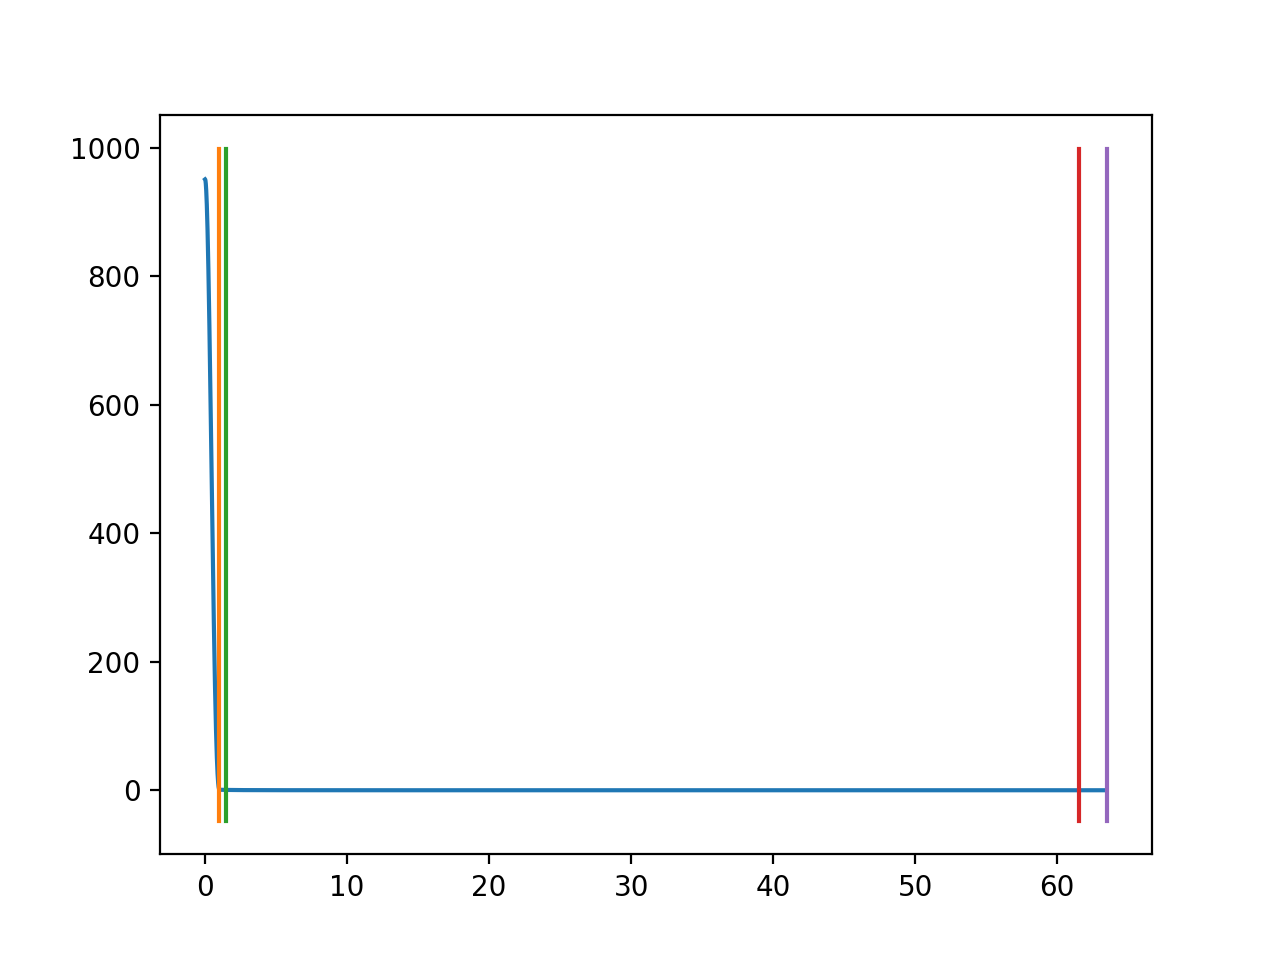

In [475]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(rs, ys.real)
ax = plt.gca()
m, M = ax.get_ylim()
for r in A.rhos/ A.scale:
    plt.plot([r, r], [m, M])

In [380]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [381]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':2000})

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Ephi'].imag, A.mesh)

### Magnetic

In [ ]:
Draw(1e1*Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)

### Poynting Vector

In [ ]:
Draw(Fs['Sz'], A.mesh)

In [ ]:
Draw(Fs['Sr'], A.mesh)

In [ ]:
import ngsolve as ng
f = ng.x**2 + ng.y **3


In [ ]:
f = f.Compile()

In [ ]:
f.Compile(realcompile=True, wait=True)


In [ ]:
from ngsolve.special_functions import jv


In [ ]:
Draw(jv(ng.x,1), A.mesh)

In [ ]:
cf = jv(ng.x,1).Compile(realcompile=True, wait=True)

In [ ]:
cf = ng.CF([jv(ng.sqrt(ng.x**2 + ng.y**2),1),2,3]).Compile(realcompile=True, wait=True)